In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## scikit-learn requirements
- Numeric data
- No missing values
- With real-world data
    - rarely the case
    - often there is a need to reprocess data first

### Dealing with categorical features
- scikit-learn will not accept categorical features by default
- Need to convert categorical features into numeric values
- Convert to binary features called dummy variables
    - 0: Observation was not that category
    - 1: Observation was that category

#### Creating dummy variables
Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

In [8]:
music = pd.read_csv('../resources/music_clean.csv')
#music_df.head()
# create the categories (only 1 in category, in training it has various categorical values)

music_df = music.drop(columns=['Unnamed: 0'])

categories = ['Jazz', 'Rap', 'Electronic', 'Rock', 'Classical', 'Blues', 'Anime', 'Country', 'Alternative', 'Hip-Hop']

music_df['genre'] = np.random.choice(categories, size=len(music_df))
print(music_df.head())
print(music_df.dtypes)

   popularity  acousticness  danceability  duration_ms  energy  \
0        60.0      0.896000         0.726     214547.0   0.177   
1        63.0      0.003840         0.635     190448.0   0.908   
2        59.0      0.000075         0.352     456320.0   0.956   
3        54.0      0.945000         0.488     352280.0   0.326   
4        55.0      0.245000         0.667     273693.0   0.647   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.000002    0.1160   -14.824       0.0353   92.934    0.618   
1          0.083400    0.2390    -4.795       0.0563  110.012    0.637   
2          0.020300    0.1250    -3.634       0.1490  122.897    0.228   
3          0.015700    0.1190   -12.020       0.0328  106.063    0.323   
4          0.000297    0.0633    -7.787       0.0487  143.995    0.300   

     genre  
0     Rock  
1  Country  
2  Country  
3  Hip-Hop  
4    Anime  
popularity          float64
acousticness        float64
danceability        floa

In [9]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True, dtype=int)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))
#print(music_df.dtypes)
print(music_dummies.head())

Shape of music_dummies: (1000, 20)
   popularity  acousticness  danceability  duration_ms  energy  \
0        60.0      0.896000         0.726     214547.0   0.177   
1        63.0      0.003840         0.635     190448.0   0.908   
2        59.0      0.000075         0.352     456320.0   0.956   
3        54.0      0.945000         0.488     352280.0   0.326   
4        55.0      0.245000         0.667     273693.0   0.647   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.000002    0.1160   -14.824       0.0353   92.934    0.618   
1          0.083400    0.2390    -4.795       0.0563  110.012    0.637   
2          0.020300    0.1250    -3.634       0.1490  122.897    0.228   
3          0.015700    0.1190   -12.020       0.0328  106.063    0.323   
4          0.000297    0.0633    -7.787       0.0487  143.995    0.300   

   genre_Anime  genre_Blues  genre_Classical  genre_Country  genre_Electronic  \
0            0            0               

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [34]:
# Create X, containing all features in music_dummies, and y, consisting of the "popularity" column, respectively.
X = music_dummies.drop(columns=['popularity'])
y = music_df['popularity']

# Instantiate a ridge regression model, setting alpha equal to 0.2.
ridge = Ridge(alpha=0.2)

# Perform cross-validation on X and y using the ridge model, setting cv equal to kf, and using negative mean squared error as the scoring metric.
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Print the RMSE values by converting negative scores to positive and taking the square root.
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

# An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate. (note that this is the result from the learning that does not reflect this result...possibly due to changes in data)

Average RMSE: 12.576532994417194
Standard Deviation of the target array: 14.02156909907019


## Missing data
- No value for a feature in a particular row
- This can occur because:
    - there may have been no observation
    - the data might be corrupt



In [35]:
# Cannot reproduce learning here as they use a non-cleaned database
print(music_df.isna().sum().sort_values())

# Drop missing data
music_df = music_df.dropna(subset=['popularity']) # etc

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


### Imputing values
- Imputation - use subject-matter expertise to replace missing data with educated guesses
- Common to use the mean
- Can also use the median or another value
- For categorical values, one can typically use the most frequent value - the mode
- **must split data first, to avoid data leakage**
- Imputers are also known as transformers


In [37]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())
# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness','liveness', 'tempo'])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

# The dataset has gone from 1000 observations down to 892, but it is now in the correct format for binary classification and the remaining missing values can be imputed as part of a pipeline.

# Note this does not work with the dataset here

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [38]:
# Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

# Import modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Instantiate an imputer
imputer = SimpleImputer(strategy='most_frequent')

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputation", imputer),
         ("knn", knn)]

In [40]:
# Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test,y_pred))

## One can scale a model building workflow using pipelines. In this case, the confusion matrix highlights that the model had 79 true positives and 82 true negatives!
#<script.py> output:
#    [[79  9]
#     [ 4 82]]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Centering and Scaling data

### Why scale our data?
- Many models use some form of distance to inform them
- Features on larger scales can disproportionately influence the model
- Example: KNN uses distance explicitly when making predictions
- We want features to be on a similar scale
- Normalizing or standardizing (scaling and centering)

### How to scale our data
- Subtract the mean and divide by variance
    - All features are centered around zero and have a variance of one
    - This is called standardization
- Can also subtract the minimum and divide by the range
    - Minimum zero and maximum one
- Can also normalize so the data ranges from -1 to +1

In [41]:
print(music_df[["duration_ms", "loudness", "speechiness"]].describe())

        duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.172204e+05    -8.253305     0.077879
std    1.175582e+05     5.158523     0.089451
min   -1.000000e+00   -38.718000     0.023400
25%    1.806562e+05    -9.775500     0.033100
50%    2.163000e+05    -6.855000     0.043600
75%    2.605025e+05    -4.977750     0.074950
max    1.617333e+06    -0.883000     0.710000


In [42]:
# Pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.
from sklearn.linear_model import Lasso

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

 # The model may have only produced an R-squared of 0.619, but without scaling this exact model would have only produced a score of 0.35, which proves just how powerful scaling can be!
 # <script.py> output:
#    0.6193523316282489

0.18202081765497558


In [48]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

# Using a pipeline shows that a logistic regression model with "C" set to approximately 0.1 produces a model with 0.8425 accuracy!

/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.045000000000000005 
 {'logreg__C': np.float64(0.001)}


## Evaluating multiple models

### Different models for different problems
- **Guiding principles:**
- Size of dataset
    - Fewer features = simpler model, faster training time
    - Some models require large amounts of data to perform well
- Interpretability
    - Some models are easier to explain, important to i.e. stakeholders
    - Linear regressions has high interpretability, as we can understand the coefficients
- Flexibility
    - May improve accuracy, by making fewer assumptions about data
    - KNN is a more flexible model, doesn't assume any linear relationships

### Metrics
- Regression model performance
    - RMSE
    - R-squared
- Classification model performance
    - Accuracy
    - Confusion matrix
    - Precision, recall, F1-score
    - ROC AUC
- Train several models and evaluate performance
- Best to scale data before evaluating performance


/var/folders/ng/2cfjcwnj7c71qy1817xdgfx40000gn/T/ipykernel_46581/1067245191.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


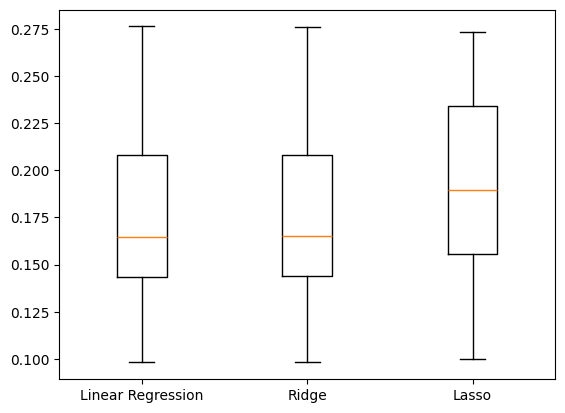

In [51]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

## Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.
# Very different plot in learning

In [52]:
#In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():

  # Fit the model to the training data
  #model.fit(X_train_scaled, y_train)

  # Make predictions on the test set
  #y_pred = model.predict(X_test_scaled)

  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

# The linear regression model just edges the best performance, although the difference is a RMSE of 0.00001 for popularity! Now let's look at classification model selection.

NameError: name 'X_train_scaled' is not defined

/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

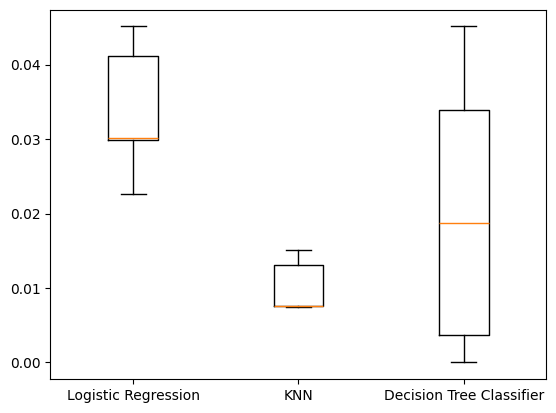

In [57]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():

  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)

  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

# Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline
# However at this point the results from the learning are very different

In [59]:
# Create steps
steps = [("imp_mean", SimpleImputer()),
         ("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlrix/Projects/machine-learning-fundamental

Tuned Logistic Regression Parameters: {'logreg__C': np.float64(0.001), 'logreg__solver': 'newton-cg'}, Accuracy: 0.055


/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## What has been learned
- Using supervised learning techniques to build predictive models
- For both regression and classification problems
- Underfitting and overfitting
- How to split data
- Cross-validation

- Reprocessing techniques
- Model selection
- Hyperparameter tuning
- Model performance evaluation
- Used pipelines